# 数理計算ライブラリのインポート

In [1]:
import gzip,csv
from __future__ import print_function
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
%matplotlib inline
import matplotlib.pyplot as plt
import time 
import math
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_recall_curve
from sklearn.learning_curve import learning_curve
from sklearn.cross_validation import train_test_split
import pylab as pl

# データのロード

In [2]:
# データ（全変数）　
fulldata = pd.read_csv("ACR_whisky_full.csv")
# データ（PCA）　
#pcadata = pd.read_csv("ACR_whisky_full.csv")

# 説明変数の定義
x = 'C1_1 + C1_1_1 + C2_1 + C2_2 + C2_3 + C2_2_1 + C2_1_1 + C2_1_1_1 + C2_1_1_2 + C2_1_1_3 + C2_2_2 + C2_1_2 + C2_1_2_1 + C2_1_2_2 + C3 + D1 + D2 + D3 + D4 + D5 + D6 + D7 + D8 + D9 + D10 + D11 + D12 + D13 + D14 + C4_1 + C4_2 + C4_3 + C4_4 + C4_5 + C4_6 + C4_7 + C4_8 + C4_9 + C4_10 + C4_11 + C4_12 + C4_13 + C4_14 + C4_15 + C4_16 + C4_17 + C4_18 + C4_19 + C4_20 + C4_21 + C4_22 + C4_23 + C5_1 + C5_2 + C5_3 + C5_4 + C5_5 + C5_6 + C5_7 + C5_8 + C5_9 + C5_10 + C5_11 + C5_12 + C5_13 + C5_14 + C5_15 + C5_16 + C5_17 + C5_18 + C5_19 + C5_20 + C5_21 + C5_22 + C6_1 + C6_2 + C6_3 + C6_4 + C6_5 + C6_6 + C6_7 + C6_8 + C6_9 + C6_10 + C6_11 + C6_12 + C6_13 + C6_14 + C6_15 + C6_16 + C6_17 + C6_18 + C6_19 + C6_20 + C6_21 + C6_22 + C6_23 + C6_24 + C6_25 + C7_1 + C7_2 + C7_3 + C7_4 + C7_5 + C7_6 + C7_7 + C7_8 + C7_9 + C7_10 + C7_11 + C7_12 + C7_13 + C7_14 + C7_15 + C7_16 + C7_17 + C7_18 + C7_19 + C7_20 + C7_21 + C7_22 + C7_23 + C8_1 + C8_2 + C8_3 + C8_4 + C8_5 + C8_6 + C8_7 + C8_8 + C8_9 + C8_10 + C8_11 + C8_12 + C8_13 + C8_14 + C8_15 + C8_16 + C8_17 + C8_18 + C8_19 + C8_20 + C8_21 + C8_22 + C8_23 + C8_24 + C8_25 + C8_26 + C8_27 + C8_28 + C8_29 + C8_30 + C8_31 + C8_32 + C8_33 + C8_34 + C8_35 + C8_36 + C8_37 + C8_38 + C8_39 + C8_40 + D15 + C9_1 + C9_2 + C9_3 + C9_4 + C9_5 + C9_6 + C9_7 + C9_8 + C9_9 + C9_10 + C9_11 + C9_12 + C9_13 + C9_14 + C9_15 + C9_16 + C9_17 + C9_18 + C9_19 + C9_20 + C9_21 + C9_22 + C9_23 + C9_24 + C9_25 + C9_26 + C9_27 + C9_28 + C9_29 + C9_30 + C9_31 + C9_32 + C9_33 + C9_34 + C9_35 + C9_36 + C10_1 + C10_2 + C10_3 + C10_4 + C10_5 + C10_6 + C10_7 + C10_8 + C10_9 + C10_10 + C11_1 + C11_2 + C11_3 + C11_4 + C11_5 + C11_6 + C11_7 + C11_8 + C11_9 + C11_10 + C11_11 + C11_12 + C11_13 + C11_14 + C11_15 + C11_16 + C11_17 + C11_18 + C11_19 + C11_20 + C11_21 + C11_22 + C11_23 + C11_24 + C12_1 + C12_2 + C12_3 + C12_4 + C12_5 + C12_6 + C12_7 + C12_8 + C12_9 + C12_10 + C12_11 + C12_12 + C12_13 + C12_14 + C12_15 + C12_16 + C12_17 + C12_18 + C12_19 + C12_20 + C12_21 + C12_22 + C12_23 + C12_24 + C12_25 + C12_26 + C12_27 + C12_28 + C12_29 + C12_30 + C12_31 + C12_32 + C12_33 + C12_34 + C12_35 + C12_36 + C12_37 + C12_38 + C12_39 + C12_40 + C12_41 + C12_42 + C12_43 + C12_44 + C12_45 + C12_46 + C12_47 + C12_48 + C12_49 + C12_50 + C12_51 + C12_52 + C12_53 + C12_54 + C12_55 + C12_56 + C12_57 + C12_58 + C12_59 + C12_60 + C12_61 + C12_62 + C12_63 + C12_64 + C12_65 + C12_66 + C12_67 + C12_68 + C12_69 + C12_70 + C12_71 + C12_72 + C12_73 + C12_74 + C12_75 + C12_76 + C12_77 + C12_78 + C12_79 + C12_80 + C12_81 + C12_82 + C12_83 + C12_84 + C12_85 + C12_86 + C12_87 + C12_88 + C12_89 + C12_90 + C12_91 + C12_92 + C12_93 + C12_94 + C12_95 + C12_96 + C12_97 + C12_98 + C12_99 + C12_100 + C13_1 + C13_2 + C13_3 + C13_4 + C13_5 + C13_6 + C13_7 + C13_8 + C13_9 + C13_10 + C13_11 + C13_12 + C13_13 + C13_14 + C13_15 + C13_16 + C13_17 + C13_18 + C13_19 + C13_20 + C13_21 + C13_22 + C13_23 + C13_24 + C13_25 + C13_26 + C13_27 + C13_28 + C13_29 + C13_30 + C14_1 + C14_2 + C14_3 + C14_4 + C14_5 + C14_6 + C14_7 + C14_8 + C14_9 + C14_10 + C14_11 + C14_12 + C14_13 + C14_14 + C14_15 + C14_16 + C14_17 + C14_18 + D16 + D17 + C15_1 + C15_2 + C15_3 + C15_4 + C15_5 + C15_6 + C15_7 + C15_8 + C15_9 + C15_10 + C16_1 + C16_2 + C16_3 + C16_4 + C16_5 + C16_6 + C16_7 + C16_8 + C16_9 + C16_10 + C16_11 + C16_12 + C16_13 + C17_1 + C17_2 + C17_3 + C17_4 + C17_5 + C17_6 + C17_7 + C17_8 + C17_9 + C18_1 + C18_2 + C18_3 + C18_4 + C18_5 + C18_6 + C18_7 + C18_8 + C18_9 + C18_10 + C18_11 + C18_12 + C18_13 + C18_14 + C18_15 + C18_16 + C18_17 + C18_18 + C18_19 + C18_20' 
# 目的変数の定義
y = fulldata['O9']

# 一般化線形モデル

#### 全ての説明変数で線形回帰

In [3]:
# statsmodelのGLMを使えるようにするモジュール
import statsmodels.api as sm
# glmの中で使う統計処理関数
from scipy import stats
# Rのglmを使用可能にするための関数
import statsmodels.formula.api as smf

In [4]:
model = smf.glm('O9 ~'+x, data=fulldata, family=sm.families.Binomial())
results = model.fit().summary()
results

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                     O9   No. Observations:                 5456
Model:                            GLM   Df Residuals:                     5027
Model Family:                Binomial   Df Model:                          428
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -2233.0
Date:                Thu, 24 Nov 2016   Deviance:                       4466.1
Time:                        08:44:18   Pearson chi2:                 5.26e+03
No. Iterations:                     8                                         
==============================================================================
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -1.5076      0.244     -6.174      0.000        -1.986    -1.029
C1_1          -0.3538      0.094     -3.769      0.000        -0.538    -0.170
C1_1_1         0.1445      0.061      2.354      0.019         0.024     0.265
C2_1          -0.1651      0.099     -1.661      0.097        -0.360     0.030
C2_2           0.0024      0.036      0.068      0.946        -0.067     0.072
C2_3          -0.3538      0.094     -3.769      0.000        -0.538    -0.170
C2_2_1        -0.4117      0.094     -4.390      0.000        -0.596    -0.228
C2_1_1         0.0580      0.057      1.014      0.311        -0.054     0.170
C2_1_1_1      -0.0865      0.091     -0.951      0.342        -0.265     0.092
C2_1_1_2       0.1444      0.082      1.757      0.079        -0.017     0.306
C2_1_1_3      -1.1538      0.163     -7.087      0.000        -1.473    -0.835
C2_2_2        -0.9307      0.145     -6.434      0.000        -1.214    -0.647
C2_1_2        -0.2231      0.078     -2.872      0.004        -0.375    -0.071
C2_1_2_1      -0.0952      0.121     -0.784      0.433        -0.333     0.143
C2_1_2_2      -0.1279      0.105     -1.220      0.222        -0.333     0.078
C3             0.0387      0.025      1.572      0.116        -0.010     0.087
D1            -0.1129      0.027     -4.211      0.000        -0.165    -0.060
D2            -0.0004      0.021     -0.021      0.984        -0.041     0.040
D3             0.0820      0.044      1.846      0.065        -0.005     0.169
D4            -0.0309      0.017     -1.805      0.071        -0.064     0.003
D5             0.0258      0.023      1.142      0.254        -0.019     0.070
D6             0.0330      0.018      1.884      0.060        -0.001     0.067
D7             0.0077      0.018      0.424      0.671        -0.028     0.043
D8             0.0283      0.023      1.215      0.225        -0.017     0.074
D9            -0.0222      0.018     -1.235      0.217        -0.057     0.013
D10           -0.0171      0.018     -0.944      0.345        -0.053     0.018
D11           -0.0494      0.018     -2.788      0.005        -0.084    -0.015
D12            0.0036      0.015      0.233      0.816        -0.027     0.034
D13           -0.0175      0.017     -1.004      0.315        -0.052     0.017
D14           -0.0063      0.016     -0.382      0.703        -0.038     0.026
C4_1          -0.1225      0.115     -1.064      0.287        -0.348     0.103
C4_2          -0.0930      0.121     -0.769      0.442        -0.330     0.144
C4_3           0.0163      0.123      0.132      0.895        -0.226     0.258
C4_4          -0.0598      0.129     -0.464      0.643        -0.312     0.193
C4_5           0.2476      0.119      2.075      0.038         0.014     0.482
C4_6           0.1652      0.115      1.437      0.151        -0.060     0.391
C4_7           0.0977      0.099      0.988      0.323        -0.096     0.291
C4

# PCA

In [5]:
from sklearn.decomposition import PCA

In [6]:
# データのロード
dnndata = pd.read_csv("ACR_DNN_whine.csv")
array = dnndata.as_matrix()

#　特徴量とラベルの分離
x = array[:,1:].astype(np.float32)

In [7]:
pca = PCA(n_components=2)
pca.fit(x)
x_pca = pca.transform(x)

In [8]:
x = np.array([]).astype(np.int32)
y = np.array([]).astype(np.int32)
for i in range(5456):
    x = np.append(x,x_pca[i,0])
    y = np.append(y,x_pca[i,1])

<bound method Figure.show of <matplotlib.figure.Figure object at 0x1156a04e0>>

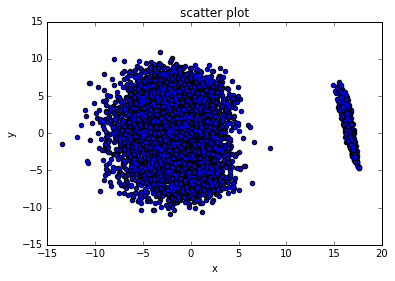

In [9]:
fig = plt.figure()

ax = fig.add_subplot(1,1,1)

ax.scatter(x,y)

ax.set_title('scatter plot')
ax.set_xlabel('x')
ax.set_ylabel('y')

fig.show

# PCAデータで一般化線形モデル

# 機械学習手法

In [10]:
# データ作読み込み
dnndata = pd.read_csv("ACR_DNN_whine.csv")
array = dnndata.as_matrix()

#　特徴量とラベルの分離
x = array[:,1:].astype(np.float32)
y = array[:,0].astype(np.int32)

rng = np.random.RandomState(0)
permutation = rng.permutation(len(x))

x, y = x[permutation], y[permutation]
train_x, test_x, train_y, test_y = train_test_split(x, y, train_size=0.7, random_state=10)

# ロジスティック回帰で分類

In [11]:
from sklearn.linear_model import LogisticRegression

In [12]:
clf = LogisticRegression()
clf.fit(train_x, train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [13]:
prediction = clf.predict(test_x)
clf.score(test_x, test_y)

0.66890653634697617

In [14]:
# 学習したパラメータの取り出し
print(clf.coef_)

[[ -4.80904599e-01   2.87979408e-01  -6.42855790e-02  -8.56038188e-02
   -4.80904599e-01  -5.55609665e-01   7.47050657e-02   3.08450510e-02
    4.38600147e-02  -8.59172703e-01  -7.20182058e-01  -1.38990645e-01
    9.86144521e-02  -2.37605097e-01   9.96149624e-02  -5.06266829e-02
    2.60451401e-02   9.36358709e-03   6.34397579e-03   4.85860261e-02
    2.84224579e-02  -6.75378876e-03   5.32647744e-02  -6.72097168e-02
   -3.94071739e-02  -1.53219786e-02  -5.00492100e-03  -1.05664599e-02
    6.72845626e-03  -1.43062546e-01   3.94025224e-02  -1.01292394e-01
    2.26442870e-03   3.15971801e-01   1.49139672e-01   1.04383029e-03
   -7.36041156e-02  -3.09329569e-02   7.77882182e-02   4.29713102e-03
    1.78080017e-01   1.61334160e-01   1.57825745e-01  -5.65312506e-02
    3.80819197e-01   1.91587412e-02   7.16569211e-02   4.25309814e-02
    1.14898683e-02  -3.89856117e-03  -8.81994228e-01  -7.39650945e-01
   -7.36994877e-02   1.15331895e-01  -7.31694799e-02  -2.39132618e-03
    9.21395247e-03  

In [15]:
print (clf.intercept_)

[-1.3400773]


# 決定木

In [16]:
# ライブラリのインポート 
from sklearn.tree import DecisionTreeClassifier

# SVM

In [17]:
# ライブラリのインポート 
from sklearn.svm import SVC

In [18]:
clf = SVC(gamma=0.001,probability=True)
clf.fit(train_x, train_y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [19]:
label_predict = clf.predict(test_x)

In [20]:
# Confusion Matrix
print (confusion_matrix(test_y, label_predict))

[[964  75]
 [465 133]]


In [21]:
# accuracy
clf.score(test_x, test_y)

0.67012828344532682

In [22]:
# Classification Report
print (classification_report(test_y, label_predict))

             precision    recall  f1-score   support

          0       0.67      0.93      0.78      1039
          1       0.64      0.22      0.33       598

avg / total       0.66      0.67      0.62      1637



[]

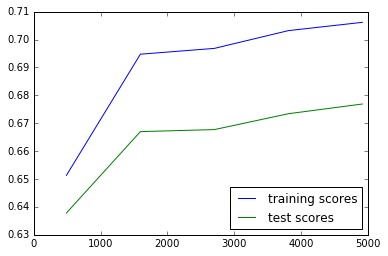

In [23]:
# learning curve
training_sizes, train_scores, test_scores = learning_curve(SVC(gamma=0.001), x, y, cv=10)
plt.plot(training_sizes, train_scores.mean(axis=1), label="training scores")
plt.plot(training_sizes, test_scores.mean(axis=1), label="test scores")
plt.legend(loc="best")
plt.plot()

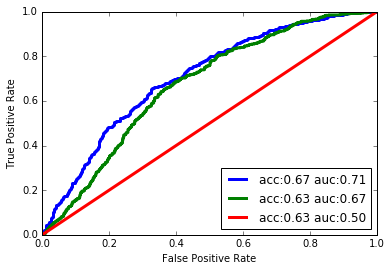

In [24]:
# ROC曲線によるパラメータの変更検証
# ROC曲線＝受信者操作特製
# 識別性能評価によく使われる指標
# 　1,0の密度関数の重なりが少ないほど、左上に遷移する曲線
# AUCが大きいほうがいい（最良なら1.0）
for gamma in[0.01, 0.05, 1]:
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    svm = SVC(gamma=gamma, probability=True).fit(train_x, train_y)
    decision_function = svm.decision_function(test_x)
    fpr, tpr, _ = roc_curve(test_y, decision_function)
    acc = svm.score(test_x, test_y)
    auc = roc_auc_score(test_y, svm.decision_function(test_x))
    plt.plot(fpr, tpr, label="acc:%0.2f auc:%0.2f" % (acc, auc), linewidth=3)
plt.legend(loc="best")

# DeepLearning（Chainer）

In [25]:
# chainer関連のインポート
import chainer
import chainer.functions as F
import chainer.links as L
from chainer import Chain, Variable, optimizers, serializers

In [26]:
# ネットワークの組み方・ハイパーパラ、メータの設定は変更なし
class MLPModel(chainer.Chain):
    def __init__(self):
        super(MLPModel,self).__init__(
                l1 = L.Linear(435,50),
                l2 = L.Linear(50,10),
                l3 = L.Linear(10,2))

    def __call__(self,x):    
        h = F.relu(self.l1(x))
        h = F.relu(self.l2(h))
        return self.l3(h)

In [27]:
class Classifier(Chain):
    def __init__(self, predictor):
        super(Classifier, self).__init__(predictor=predictor)

    def __call__(self, x, t):
        y = self.predictor(x)
        loss = F.softmax_cross_entropy(y, t)
        accuracy = F.accuracy(y, t)
        
        # report()関数は損失と精度の値をtrainerに報告する
        report({'loss': loss, 'accuracy': accuracy}, self)
        return loss

In [28]:
# データ作成　
dnndata = pd.read_csv("ACR_DNN_whine.csv")
array = dnndata.as_matrix()

#　特徴量とラベルの分離
x = array[:,1:].astype(np.float32)
y = array[:,0].astype(np.int32)

# 教師とトレーニングの分割
datasize = 3800
x_train, x_test = np.split(x, [datasize])  
y_train, y_test = np.split(y, [datasize])  


# パラメータ設定
results = [] 
batchsize = 50 #ミニバッチ学習におけるバッチ数の指定
test_batchsize = 10

enable_cupy = False
n_epoch=5  #エポック数指定

In [29]:
model = L.Classifier(MLPModel())
optimizer = chainer.optimizers.Adam()
optimizer.setup(model)

In [30]:
def train_and_test():
    
    #Model training
    training_start = time.clock()
    
    # 学習開始
    for epoch in range(n_epoch):
        print('epoch %d start' % (epoch+1))
        indexes = np.random.permutation(datasize)
        for i in range(0, datasize, batchsize):
            x = Variable(np.asarray(x_train[indexes[i : i + batchsize]]))
            t = Variable(np.asarray(y_train[indexes[i : i + batchsize]]))
            
            optimizer.update(model, x, t)
            
            train_acc.append(model.accuracy.data)
            train_loss.append(model.loss.data)
            
        print('epoch %d finished' % (epoch+1))
    print('training finished')
    elapsed_time = time.clock() - training_start

    #テスト開始
    sum_loss, sum_accuracy = 0, 0
    print('test start')
    for i in range(0, 1656, test_batchsize):
        x = Variable(np.asarray(x_test[i : i + test_batchsize]))
        t = Variable(np.asarray(y_test[i : i + test_batchsize]))
       
        loss = model(x, t)
        
        test_acc.append(model.accuracy.data)
        test_loss.append(model.loss.data)
        
        sum_loss += loss.data * test_batchsize #lossは学習中に平均化されているため、batchsizeで掛ける必要がある
        sum_accuracy += model.accuracy.data * test_batchsize
    
    mean_loss = sum_loss / 1656
    mean_accuracy = sum_accuracy / 1656
    results.append([model.predictor.__class__.__name__, enable_cupy, n_epoch, mean_loss, mean_accuracy, elapsed_time])
    print('test finished')

In [31]:
train_acc=[]
test_acc=[]
train_loss=[]
test_loss=[]
train_and_test()

epoch 1 start
epoch 1 finished
epoch 2 start
epoch 2 finished
epoch 3 start
epoch 3 finished
epoch 4 start
epoch 4 finished
epoch 5 start
epoch 5 finished
training finished
test start
test finished


In [32]:
def print_result():
    for i , (net, cupy, num, loss, acc, elapsed) in zip(range(len(results)), results):
        print('#%d net=%s cupy=%s n_epoch=%d loss=%f accuracy=%f time=%dsec' % (i+1, net, cupy, num, loss, acc, elapsed))
print_result()

#1 net=MLPModel cupy=False n_epoch=5 loss=0.594809 accuracy=0.675725 time=1sec


In [33]:
#　モデルの評価
predictions = np.array([]).astype(np.int32)
for i in range(0, 1656):
    x = Variable(np.asarray(x_test[i:i+1])) #test data
    t = Variable(np.asarray(y_test[i:i+1])) #labels
    _ = model(x, t)
    y = F.softmax(model.predictor(x))
    prediction = model.y.data

[[855 206]
 [333 262]]
             precision    recall  f1-score   support

          0       0.72      0.81      0.76      1061
          1       0.56      0.44      0.49       595

avg / total       0.66      0.67      0.66      1656



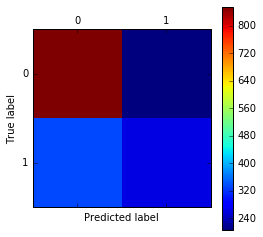

In [34]:
#　モデルの評価
predictions = np.array([]).astype(np.int32)
for i in range(0, 1656):
    x = Variable(np.asarray(x_test[i:i+1])) #test data
    t = Variable(np.asarray(y_test[i:i+1])) #labels
    _ = model(x, t)
    prediction = model.y.data.argmax(axis=1)
    predictions = np.append(predictions,prediction[0])

print (confusion_matrix(y_test, predictions))
plt.matshow(confusion_matrix(y_test, predictions))
plt.colorbar()
plt.xlabel("Predicted label")
plt.ylabel("True label")
print (classification_report(y_test, predictions))

[]

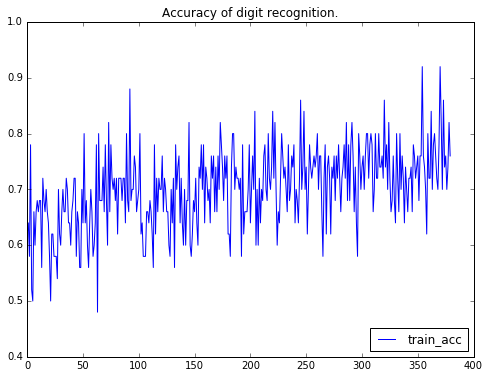

In [35]:
# 学習曲線(train_acc)
plt.figure(figsize=(8,6))
plt.plot(range(len(train_acc)),train_acc)
plt.legend(["train_acc","test_acc"],loc=4)
plt.title("Accuracy of digit recognition.")
plt.plot()

[]

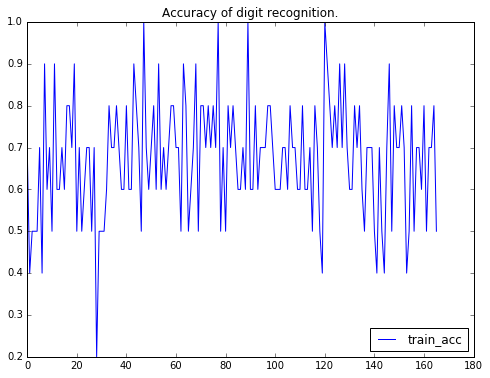

In [36]:
# 学習曲線(test_acc)
plt.figure(figsize=(8,6))
plt.plot(range(len(test_acc)),test_acc)
plt.legend(["train_acc","test_acc"],loc=4)
plt.title("Accuracy of digit recognition.")
plt.plot()

[]

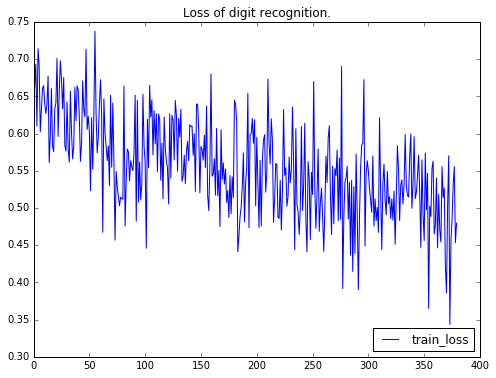

In [37]:
# 学習曲線(train_loss)
plt.figure(figsize=(8,6))
plt.plot(range(len(train_loss)),train_loss)
plt.legend(["train_loss","test_loss"],loc=4)
plt.title("Loss of digit recognition.")
plt.plot()

[]

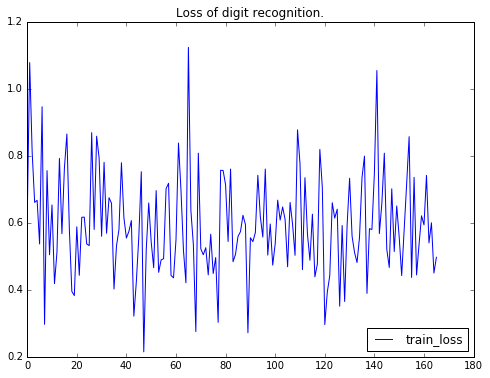

In [38]:
# 学習曲線(test_loss)
plt.figure(figsize=(8,6))
plt.plot(range(len(test_loss)),test_loss)
plt.legend(["train_loss","test_loss"],loc=4)
plt.title("Loss of digit recognition.")
plt.plot()

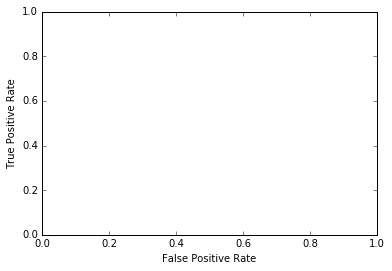

In [39]:
# DeepLearningでROC曲線
## Decision Functin = 決定境界（確率の推定）　→　softmaxの出力血を確認すればいいのでは？
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

In [40]:
# クロスバリデーション、グリッドサーチという手法を使うのも手段の一つ

# 実験

In [41]:
class MLP(ChainList):
    def __init__(self, nobias_flag, config):
        # Initialize MLP structure (ChainList)
        super(MLP, self).__init__()
        
        # Add input - hidden layers
        for n1, n2 in config.hidden_pairs:
            self.add_link(L.Linear(n1, n2, nobias = nobias_flag))

        # Add output layer
        self.add_link(
            L.Linear(
                config.n_hiddens[-1],
                config.n_output,
                nobias = nobias_flag
            )
        )
        
        # Set some params
        self.nobias_flag = nobias_flag
 
    def __call__(self, x):
        # Compute forward direction
        h   = x
        idx = 0
        while idx < self.__len__() - 1:
            layer = self.__getitem__(idx)
            idx += 1
            h = F.sigmoid(layer(h))
        output_layer = self.__getitem__(idx)
        return output_layer(h)
    
    def dump(self):
        print(self.hidden_layer.W.data)                        
        if not self.nobias_flag:
            print(self.hidden_layer.b.data)
        print(self.output_layer.W.data)
        if not self.nobias_flag:
            print(self.output_layer.b.data)

class Classifier(Chain):
    def __init__(self, predictor):
        super(Classifier, self).__init__(predictor = predictor)
 
    def __call__(self, x, t):
        y = self.predictor(x)
        self.loss = F.softmax_cross_entropy(y, t)
        self.accuracy = F.accuracy(y, t)
        return self.loss, self.accuracy
                            
def gen_config(n_input, n_hiddens, n_output):
    # Construct pair of hidden layer config
    a, b = itertools.tee([n_input] + n_hiddens)
    next(b, None)
    hidden_pairs = itertools.izip(a, b)
    MLPConfig = namedtuple('MLPConfig', 'n_input n_hiddens n_output hidden_pairs')
    config = MLPConfig(n_input, n_hiddens, n_output, hidden_pairs)
    return config
 
# Test task
def problem_set(name):
    Dataset = namedtuple('Dataset', 'data label')
    xor_dataset = Dataset(
        [
            [0, 0], [1, 0], [0, 1], [1, 1]
        ], [
            0, 1, 1, 0
        ]
    )
 
    parity_4bits_dataset = Dataset(        [
            [0, 0, 0, 0], [0, 0, 0, 1], [0, 0, 1, 0], [0, 0, 1, 1],
            [0, 1, 0, 0], [0, 1, 0, 1], [0, 1, 1, 0], [0, 1, 1, 1],
            [1, 0, 0, 0], [1, 0, 0, 1], [1, 0, 1, 0], [1, 0, 1, 1],
            [1, 1, 0, 0], [1, 1, 0, 1], [1, 1, 1, 0], [1, 1, 1, 1]
        ], [
            0, 1, 1, 0,
            1, 0, 0, 1,
            1, 0, 0, 1,
            0, 1, 1, 0
        ]
    )
 
    dataset = Dataset([], [])
    if name == 'xor':
        dataset = xor_dataset
    else:
        dataset = parity_4bits_dataset
    np_data = Variable(np.array(dataset.data, dtype = np.float32))
    np_label = Variable(np.array(dataset.label, dtype = np.int32))
    return np_data, np_label
                            
# Prepare problem
x, t = problem_set('parity')
 
# Configuration for each layer dimensions
input_dim   = len(x.data[0])
hidden_dims = [20]
output_dim  = 2
config      = gen_config(input_dim, hidden_dims, output_dim)

# Create model and optimizer
model     = Classifier(MLP(False, config))
#optimizer = optimizers.Adam()
optimizer = optimizers.AdaDelta()
optimizer.setup(model)
loss_value = 100000
n_iteration = 0
while loss_value > 1e-5:
    # Training
    model.zerograds()
    loss, accuracy = model(x, t)
    loss.backward()
    optimizer.update()
    
    n_iteration += 1
    if n_iteration % 1000 == 0:
        # Show progress
        y = F.softmax(model.predictor(x))
        print("Summary: iter = {0}, loss = {1}, accuracy = {2}".format(n_iteration, loss.data, accuracy.data))
        print("Output: {0}".format(y.data))
        print("Result: {0}".format(y.data.argmax(1))

SyntaxError: unexpected EOF while parsing (<ipython-input-41-6d88bb8fff5e>, line 122)